In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\CHIBUIKE OGODO\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\CHIBUIKE OGODO\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
C:\Users\CHIBUIKE OGODO\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df = pd.read_csv(r"C:\Users\CHIBUIKE OGODO\Desktop\Data/OfficeSupply.csv")

In [4]:
df

,Segment,State,Product,Discount Band,UnitsSold,ManufacturingPrice,SalePrice,Date
0,Government,Lagos State,A4 Paper,None,1618.5,3,20,"Wednesday, 1 January 2014"
1,Government,Osun State,A4 Paper,None,1321.0,3,20,"Wednesday, 1 January 2014"
2,Midmarket,Ogun State,A4 Paper,None,2178.0,3,15,"Sunday, 1 June 2014"
3,Midmarket,Enugu state,A4 Paper,None,888.0,3,15,"Sunday, 1 June 2014"
4,Midmarket,Ondo State,A4 Paper,None,2470.0,3,15,"Sunday, 1 June 2014"
...,...,...,...,...,...,...,...,...
695,Small Business,Imo State,Stapler,High,2475.0,260,300,"Saturday, 1 March 2014"
696,Small Business,Ondo State,Stapler,High,546.0,260,300,"Wednesday, 1 October 2014"
697,Government,Ondo State,Pencil,High,1368.0,5,7,"Saturday, 1 February 2014"
698,Government,Imo State,Biro,High,723.0,10,7,"Tuesday, 1 April 2014"


# 1. Data Clearning Phase

In [12]:
#Checking for duplicates
df.duplicated().sum()

0

In [13]:
#checking for null values
df.isnull().sum()

Segment               0
State                 0
Product               0
Discount Band         0
UnitsSold             0
ManufacturingPrice    0
SalePrice             0
Date                  0
dtype: int64

In [15]:
#checking the datatypes and correcting our data types
df.dtypes

Segment                object
State                  object
Product                object
Discount Band          object
UnitsSold             float64
ManufacturingPrice      int64
SalePrice               int64
Date                   object
dtype: object

In [19]:
#changing the Date datatype
df['Date'] = pd.to_datetime(df['Date'])

#changing ManufacturingPrice and SalePrice to Float because its currrency
df['ManufacturingPrice'] = df['ManufacturingPrice'].astype(float)
df['SalePrice'] = df['SalePrice'].astype(float)

In [20]:
df.dtypes

Segment                       object
State                         object
Product                       object
Discount Band                 object
UnitsSold                    float64
ManufacturingPrice           float64
SalePrice                    float64
Date                  datetime64[ns]
dtype: object

In [21]:
# Handling Outliers
# Calculate the IQR for 'Sales Price' and 'Manufacture Cost'
Q1 = df[['SalePrice', 'ManufacturingPrice']].quantile(0.25)
Q3 = df[['SalePrice', 'ManufacturingPrice']].quantile(0.75)
IQR = Q3 - Q1

# Filter out outliers
df = df[~((df[['SalePrice', 'ManufacturingPrice']] < (Q1 - 1.5 * IQR)) | (df[['SalePrice', 'ManufacturingPrice']] > (Q3 + 1.5 * IQR))).any(axis=1)]


In [22]:
df

,Segment,State,Product,Discount Band,UnitsSold,ManufacturingPrice,SalePrice,Date
0,Government,Lagos State,A4 Paper,None,1618.5,3.0,20.0,2014-01-01
1,Government,Osun State,A4 Paper,None,1321.0,3.0,20.0,2014-01-01
2,Midmarket,Ogun State,A4 Paper,None,2178.0,3.0,15.0,2014-06-01
3,Midmarket,Enugu state,A4 Paper,None,888.0,3.0,15.0,2014-06-01
4,Midmarket,Ondo State,A4 Paper,None,2470.0,3.0,15.0,2014-06-01
...,...,...,...,...,...,...,...,...
695,Small Business,Imo State,Stapler,High,2475.0,260.0,300.0,2014-03-01
696,Small Business,Ondo State,Stapler,High,546.0,260.0,300.0,2014-10-01
697,Government,Ondo State,Pencil,High,1368.0,5.0,7.0,2014-02-01
698,Government,Imo State,Biro,High,723.0,10.0,7.0,2014-04-01


In [25]:
#Standardizing and removing white spaces from every Categorical data
df['Segment']= df['Segment'].str.title().str.strip()
df['State']= df['State'].str.title().str.strip()
df['Product']= df['Product'].str.title().str.strip()
df['Discount Band']= df['Discount Band'].str.title().str.strip()

In [26]:
#Checking the summary statistics to ensure data integrity
df.describe()

,UnitsSold,ManufacturingPrice,SalePrice,Date
count,700.000000,700.000000,700.000000,700
mean,1608.294286,96.477143,118.428571,2014-04-28 21:36:00
min,200.000000,3.000000,7.000000,2013-09-01 00:00:00
25%,905.000000,5.000000,12.000000,2013-12-24 06:00:00
50%,1542.500000,10.000000,20.000000,2014-05-16 12:00:00
75%,2229.125000,250.000000,300.000000,2014-09-08 12:00:00
max,4492.500000,260.000000,350.000000,2014-12-01 00:00:00
std,867.427859,108.602612,136.775515,NaN


# 2. Exploratory Analysis

# Question 1: Which Products Generate the Highest Sales and Profits?

In [28]:
#Step 1: Calculate Total Sales and Profit for Each Product

# Calculate total sales for each product
df['Total Sales'] = df['UnitsSold'] * df['SalePrice']

# Calculate profit for each product
df['Profit'] = (df['SalePrice'] - df['ManufacturingPrice']) * df['UnitsSold']

# Group by product and calculate total sales and profit
product_sales_profit = df.groupby('Product').agg({'Total Sales': 'sum', 'Profit': 'sum'}).reset_index()
product_sales_profit

,Product,Total Sales,Profit
0,A4 Paper,14937520.5,14496982.5
1,Biro,35611662.0,32229267.0
2,Markers,19826768.5,335828.5
3,Notepad,21968533.5,-20227216.5
4,Pencil,16549834.5,15778844.5
5,Stapler,19037279.5,-21344620.5


In [29]:
df

,Segment,State,Product,Discount Band,UnitsSold,ManufacturingPrice,SalePrice,Date,Total Sales,Profit
0,Government,Lagos State,A4 Paper,None,1618.5,3.0,20.0,2014-01-01,32370.0,27514.5
1,Government,Osun State,A4 Paper,None,1321.0,3.0,20.0,2014-01-01,26420.0,22457.0
2,Midmarket,Ogun State,A4 Paper,None,2178.0,3.0,15.0,2014-06-01,32670.0,26136.0
3,Midmarket,Enugu State,A4 Paper,None,888.0,3.0,15.0,2014-06-01,13320.0,10656.0
4,Midmarket,Ondo State,A4 Paper,None,2470.0,3.0,15.0,2014-06-01,37050.0,29640.0
...,...,...,...,...,...,...,...,...,...,...
695,Small Business,Imo State,Stapler,High,2475.0,260.0,300.0,2014-03-01,742500.0,99000.0
696,Small Business,Ondo State,Stapler,High,546.0,260.0,300.0,2014-10-01,163800.0,21840.0
697,Government,Ondo State,Pencil,High,1368.0,5.0,7.0,2014-02-01,9576.0,2736.0
698,Government,Imo State,Biro,High,723.0,10.0,7.0,2014-04-01,5061.0,-2169.0


In [31]:
#Step 2: Rank Products Based on Sales and Profit

# Rank products based on total sales
product_sales_profit['Sales Rank'] = product_sales_profit['Total Sales'].rank(ascending=False)

# Rank products based on profit
product_sales_profit['Profit Rank'] = product_sales_profit['Profit'].rank(ascending=False)

product_sales_profit

,Product,Total Sales,Profit,Sales Rank,Profit Rank
0,A4 Paper,14937520.5,14496982.5,6.0,3.0
1,Biro,35611662.0,32229267.0,1.0,1.0
2,Markers,19826768.5,335828.5,3.0,4.0
3,Notepad,21968533.5,-20227216.5,2.0,5.0
4,Pencil,16549834.5,15778844.5,5.0,2.0
5,Stapler,19037279.5,-21344620.5,4.0,6.0


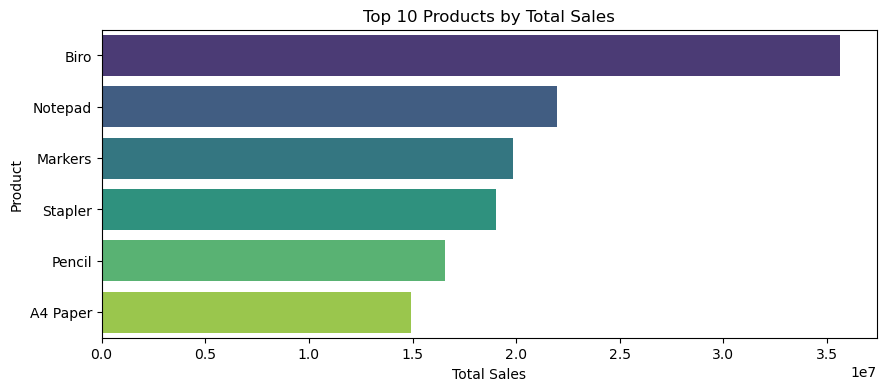

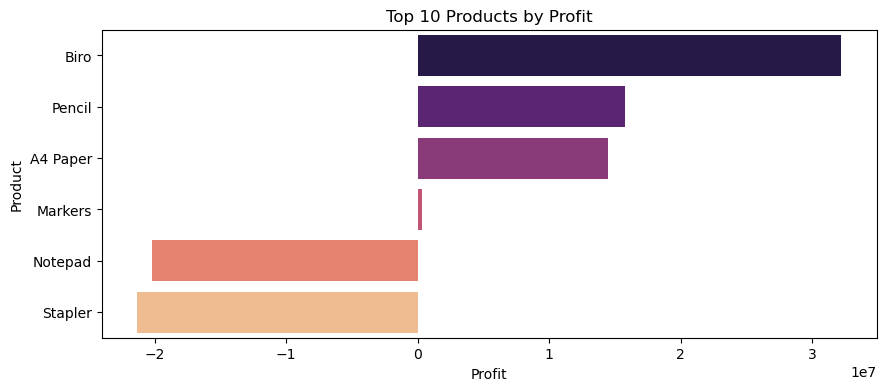

In [35]:
#Step 3: Visualize the Top-Performing Products

# Top 10 products by total sales
top_10_sales = product_sales_profit.sort_values('Total Sales', ascending=False).head(10)

# Top 10 products by profit
top_10_profit = product_sales_profit.sort_values('Profit', ascending=False).head(10)

# Plotting top 10 products by sales
plt.figure(figsize=(10, 4))
sns.barplot(data=top_10_sales, x='Total Sales', y='Product', palette='viridis')
plt.title('Top 10 Products by Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Product')
plt.show()

# Plotting top 10 products by profit
plt.figure(figsize=(10, 4))
sns.barplot(data=top_10_profit, x='Profit', y='Product', palette='magma')
plt.title('Top 10 Products by Profit')
plt.xlabel('Profit')
plt.ylabel('Product')
plt.show()

# Question 2: Which State Have the Highest and Lowest Sales Volumes?

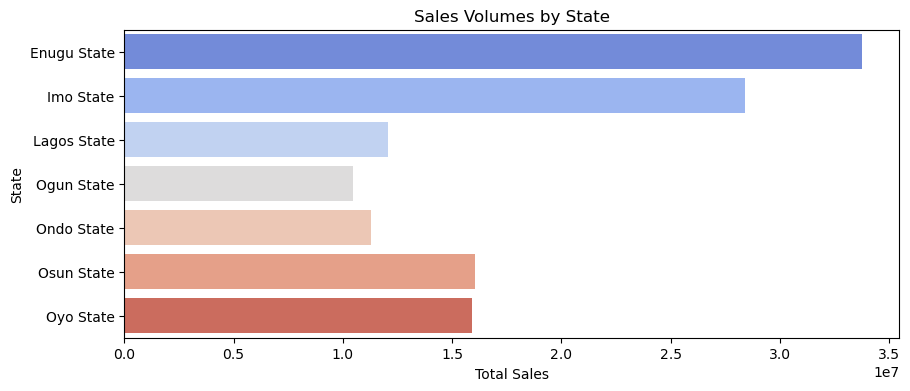

In [39]:
# Calculate total sales for each State
state_sales = df.groupby('State')['Total Sales'].sum().reset_index()

# Rank regions based on total sales
state_sales['Sales Rank'] = state_sales['Total Sales'].rank(ascending=False)

# Plotting sales volumes by region
plt.figure(figsize=(10, 4))
sns.barplot(data=state_sales, x='Total Sales', y='State', palette='coolwarm')
plt.title('Sales Volumes by State')
plt.xlabel('Total Sales')
plt.ylabel('State')
plt.show()

# Question 3: How Does the Discount Bands Affect Sales Volumes?

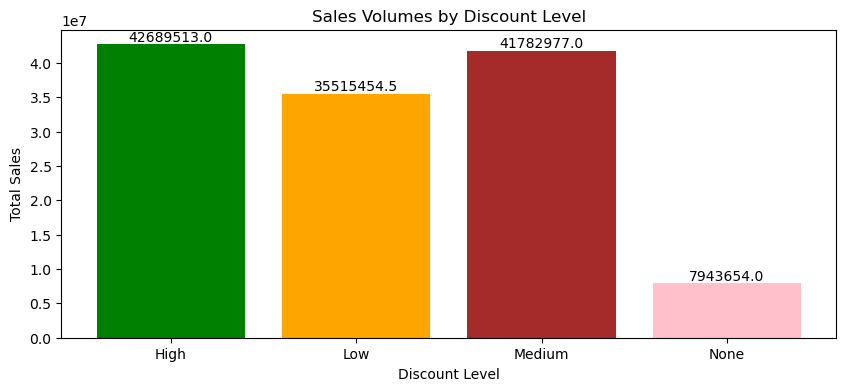

In [50]:
# Calculate total sales for each discount level
discount_sales = df.groupby('Discount Band')['Total Sales'].sum().reset_index()
plt.figure(figsize=(10, 4))
bars = plt.bar(discount_sales['Discount Band'],discount_sales['Total Sales'], color=['green', 'orange','brown','pink'])
for index, value in enumerate(discount_sales['Total Sales']):
    plt.text(index, value, str(value), ha='center', va='bottom')
plt.title('Sales Volumes by Discount bands')
plt.xlabel('Discount Level')
plt.ylabel('Total Sales')
plt.show()

# Question 4: What is the Trend of Sales of product Over Time?

In [62]:
# Ensure the 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract year and month from the 'Date' column
df['Month'] = df['Date'].dt.month_name()
df

,Segment,State,Product,Discount Band,UnitsSold,ManufacturingPrice,SalePrice,Date,Total Sales,Profit,Month
0,Government,Lagos State,A4 Paper,None,1618.5,3.0,20.0,2014-01-01,32370.0,27514.5,January
1,Government,Osun State,A4 Paper,None,1321.0,3.0,20.0,2014-01-01,26420.0,22457.0,January
2,Midmarket,Ogun State,A4 Paper,None,2178.0,3.0,15.0,2014-06-01,32670.0,26136.0,June
3,Midmarket,Enugu State,A4 Paper,None,888.0,3.0,15.0,2014-06-01,13320.0,10656.0,June
4,Midmarket,Ondo State,A4 Paper,None,2470.0,3.0,15.0,2014-06-01,37050.0,29640.0,June
...,...,...,...,...,...,...,...,...,...,...,...
695,Small Business,Imo State,Stapler,High,2475.0,260.0,300.0,2014-03-01,742500.0,99000.0,March
696,Small Business,Ondo State,Stapler,High,546.0,260.0,300.0,2014-10-01,163800.0,21840.0,October
697,Government,Ondo State,Pencil,High,1368.0,5.0,7.0,2014-02-01,9576.0,2736.0,February
698,Government,Imo State,Biro,High,723.0,10.0,7.0,2014-04-01,5061.0,-2169.0,April


In [69]:
#Grouping the products and the months as against the salesprice
product_sales_overtime = df.groupby(['Product','Month'])['SalePrice'].sum().reset_index()

#Creating a pivot table for properly visualise it
pivotAnalysis = product_sales_overtime.pivot(index='Product', columns='Month', values='SalePrice').fillna(0)
pivotAnalysis

Month,April,August,December,February,January,July,June,March,May,November,October,September
Product,,,,,,,,,,,,
A4 Paper,415.0,387.0,2180.0,60.0,80.0,614.0,1625.0,1750.0,80.0,118.0,2611.0,475.0
Biro,680.0,123.0,2958.0,175.0,1878.0,1135.0,3951.0,725.0,1878.0,5360.0,2134.0,855.0
Markers,90.0,330.0,1597.0,625.0,82.0,1950.0,1459.0,60.0,82.0,1242.0,4329.0,715.0
Notepad,1086.0,2000.0,2260.0,1500.0,173.0,85.0,699.0,35.0,173.0,850.0,3659.0,2586.0
Pencil,1600.0,907.0,1482.0,35.0,1412.0,310.0,135.0,75.0,1412.0,560.0,1327.0,1635.0
Stapler,274.0,398.0,1958.0,1750.0,520.0,51.0,421.0,1500.0,520.0,160.0,2520.0,2024.0


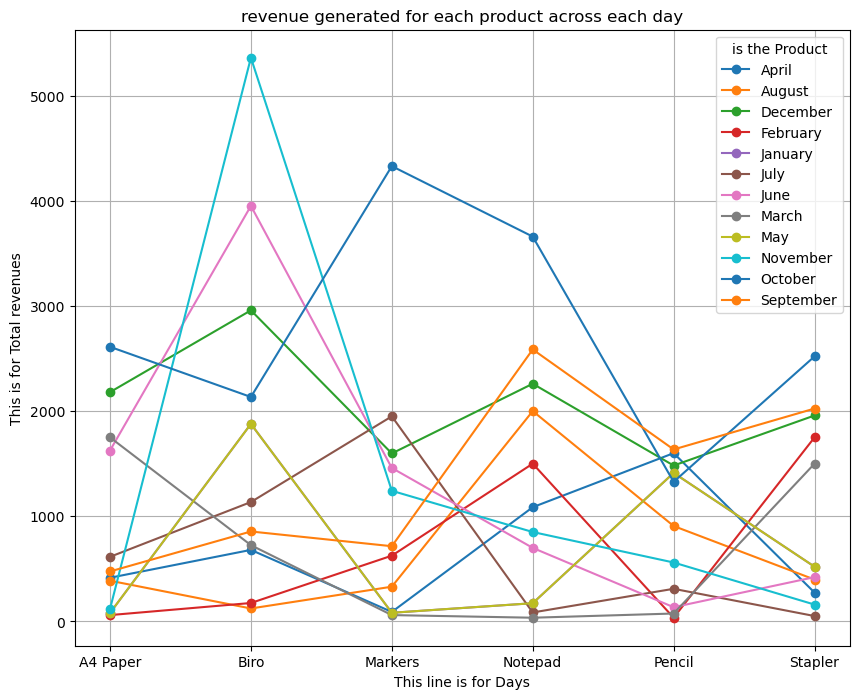

In [72]:
pivotAnalysis.plot(kind='line', marker='o', figsize=(10,8))
plt.xlabel('This line is for Days')
plt.ylabel('This is for Total revenues')
plt.title('revenue generated for each product across each day')
plt.legend(title='is the Product')
plt.grid(True)
plt.show()

# Question 5: What is the Distribution of Sales Prices?

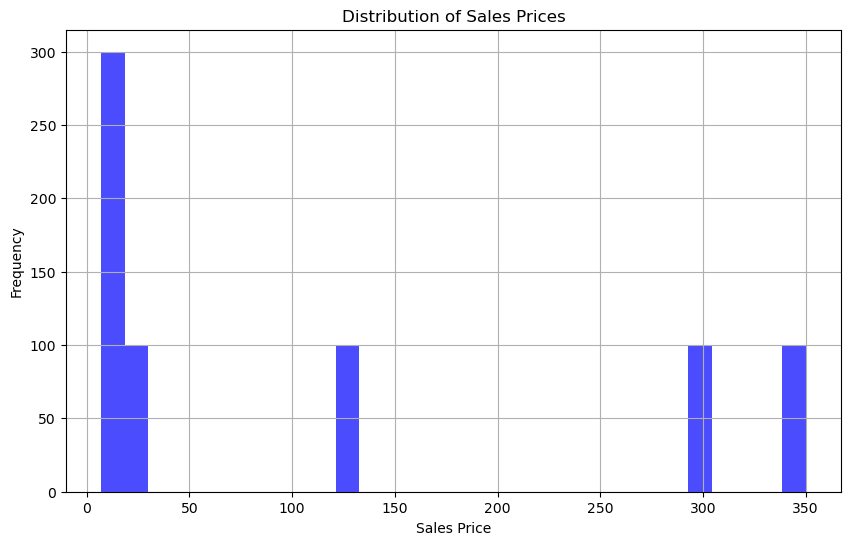

In [8]:
# Plot histogram for 'Sales Price'
plt.figure(figsize=(10, 6))
plt.hist(df['SalePrice'], bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Sales Prices')
plt.xlabel('Sales Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [10]:
# Calculate summary statistics
mean_sales_price = df['SalePrice'].mean()
median_sales_price = df['SalePrice'].median()
std_sales_price = df['SalePrice'].std()

print(f"Mean Sales Price: {mean_sales_price}")
print(f"Median Sales Price: {median_sales_price}")
print(f"Standard Deviation of Sales Price: {std_sales_price}")


Mean Sales Price: 118.42857142857143
Median Sales Price: 20.0
Standard Deviation of Sales Price: 136.7755145691398


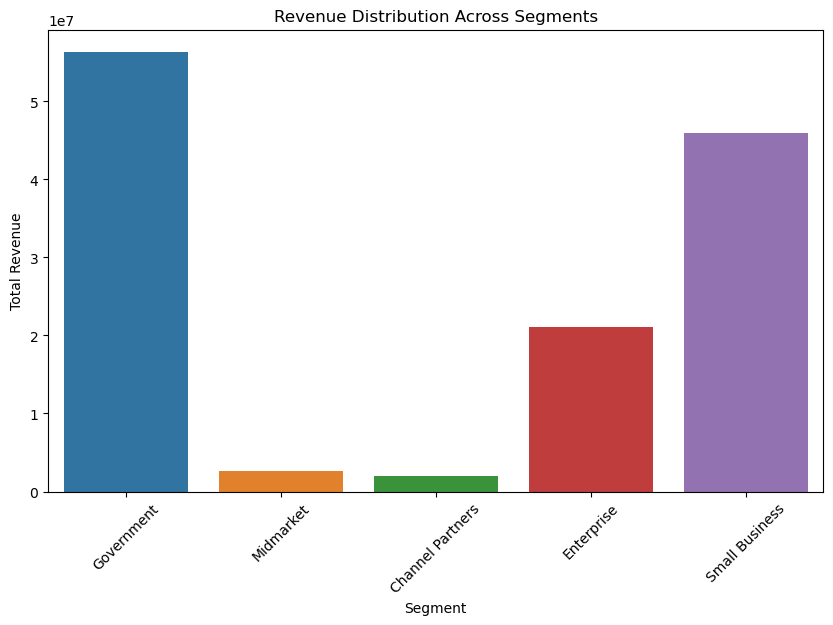

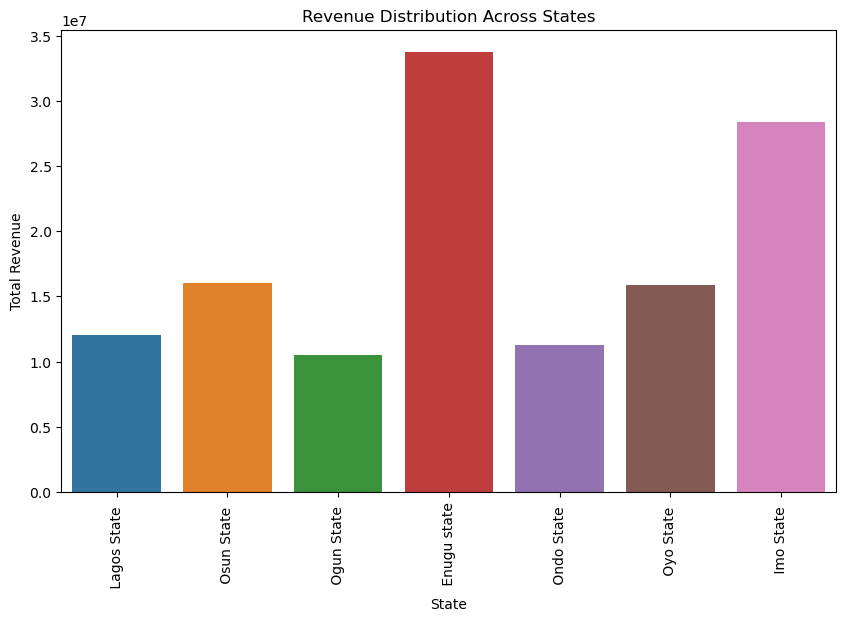

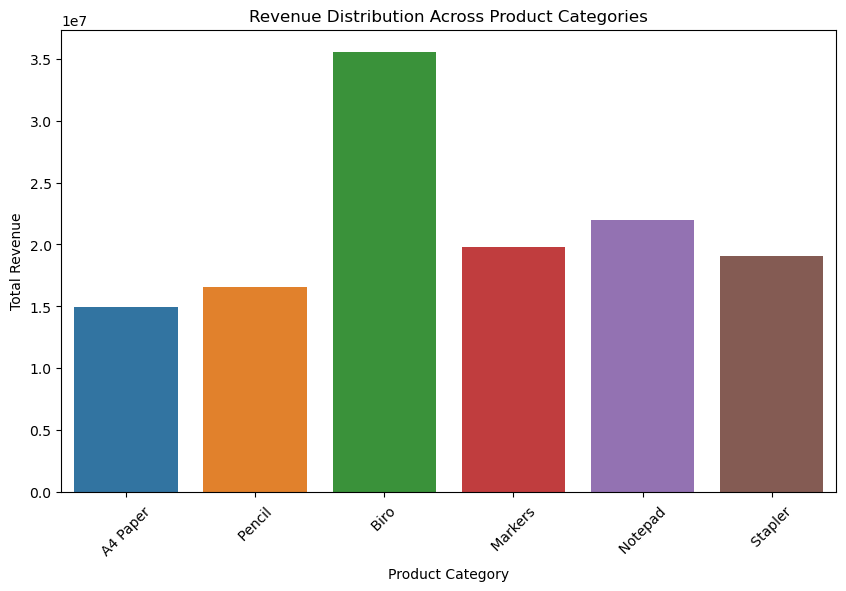

In [13]:
df['Revenue'] = df['UnitsSold'] * df['SalePrice']
# Distribution across segments
plt.figure(figsize=(10, 6))
sns.barplot(x='Segment', y='Revenue', data=df, estimator=sum, ci=None)
plt.title('Revenue Distribution Across Segments')
plt.xlabel('Segment')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

# Distribution across states
plt.figure(figsize=(10, 6))
sns.barplot(x='State', y='Revenue', data=df, estimator=sum, ci=None)
plt.title('Revenue Distribution Across States')
plt.xlabel('State')
plt.ylabel('Total Revenue')
plt.xticks(rotation=90)
plt.show()

# Distribution across product categories
plt.figure(figsize=(10, 6))
sns.barplot(x='Product', y='Revenue', data=df, estimator=sum, ci=None)
plt.title('Revenue Distribution Across Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()
